In [1]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 12.4 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from numpy.random import seed
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import visualkeras
from PIL import ImageFont

In [3]:
#global seed
seed(42)
tf.random.set_seed(42)

## Data Preprocessing

In [5]:
xtrain = np.load('/content/Xtrain_Classification1.npy')
ytrain = np.load('/content/ytrain_Classification1.npy')

xtest = np.load('/content/Xtest_Classification1.npy')

In [6]:
# get shapes

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)



(6254, 2352)
(6254,)
(1764, 2352)


In [7]:
y1 = np.sum(ytrain)
y0 = len(ytrain)-y1

print(y1,y0)
print(y1/len(ytrain)*100,y0/len(ytrain)*100)

896.0 5358.0
14.326830828269907 85.6731691717301


In [8]:
# normalize pixel values to be between 0 and 1
x_train_n, x_test_n = xtrain / 255.0, xtest / 255.0

# print shapes

print(x_train_n.shape)
print(x_test_n.shape)

print(np.max(x_train_n))
print(np.max(x_test_n))

(6254, 2352)
(1764, 2352)
1.0
1.0


In [9]:
# get validation set

xtrainv, xtestv, ytrainv, ytestv = train_test_split(x_train_n, ytrain, test_size = 0.1, shuffle = True, random_state=42)

In [10]:
y1v = np.sum(ytrainv)
y0v = len(ytrainv)-y1v

print(y1v,y0v)
print(y1v/len(ytrainv)*100,y0v/len(ytrainv)*100)

794.0 4834.0
14.108031272210377 85.89196872778963


In [11]:
print(ytrain)

[1. 1. 0. ... 0. 1. 0.]


In [12]:
print(np.max(xtrainv))
print(np.max(xtestv))
print(xtrainv.shape)
print(ytrainv.shape)

1.0
1.0
(5628, 2352)
(5628,)


In [13]:
print(xtrainv.shape)
print(xtestv.shape)


(5628, 2352)
(626, 2352)


In [14]:
# balance

smote = SMOTE(k_neighbors=5)
x_trainb, y_trainb = smote.fit_resample(xtrainv,ytrainv)

print(x_trainb.shape)
print(y_trainb.shape)

y1b = np.sum(y_trainb)
y0b = len(y_trainb)-y1b

print(y1b,y0b)

(9668, 2352)
(9668,)
4834.0 4834.0


In [15]:
def balancedaccuracy(tp,tn,fp,fn):
  sens = tp/(tp+fn)
  spe = tn/(tn+fp)

  bal_acc2 = (sens+spe)/2
  return bal_acc2

## Sklearn Classifiers

In [ ]:
#NAIVEBAYES
print(x_trainb.shape)
print(y_trainb.shape)
print(xtestv.shape)

gnb = GaussianNB()
y_pred = gnb.fit(x_trainb, y_trainb).predict(xtestv)
tn, fp, fn, tp = confusion_matrix(ytestv,y_pred).ravel()
balancedaccuracy(tp,tn,fp,fn)


(9668, 2352)
(9668,)
(626, 2352)


0.7221785660829217

In [ ]:
# SVM
clf = svm.SVC()
clf.fit(x_trainb, y_trainb)
y_pred = clf.predict(xtestv)
tn, fp, fn, tp = confusion_matrix(ytestv,y_pred).ravel()
balancedaccuracy(tp,tn,fp,fn)


0.7828169435713217

In [ ]:
# MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(x_trainb, y_trainb)
y_pred = clf.predict(xtestv)
tn, fp, fn, tp = confusion_matrix(ytestv,y_pred).ravel()
balancedaccuracy(tp,tn,fp,fn)

0.7557064810657087

# Data Visualization

In [16]:
# reshape to 28x28x3

x_trainbr = np.reshape(x_trainb, (x_trainb.shape[0],28,28,3))
x_testvr = np.reshape(xtestv, (xtestv.shape[0],28,28,3))
xtestr = np.reshape(x_test_n, (x_test_n.shape[0],28,28,3))

print(x_trainbr.shape)
print(x_testvr.shape)
print(np.max(x_trainbr))
print(np.max(x_testvr))
print(xtestr.shape)
print(np.max(xtestr))

(9668, 28, 28, 3)
(626, 28, 28, 3)
1.0
1.0
(1764, 28, 28, 3)
1.0


In [37]:
# reshape the imbalanced dataset

xtrainimb_r = np.reshape(xtrainv, (xtrainv.shape[0],28,28,3))

# before smote
num_images_to_visualize = 50
indices = np.random.choice(len(xtrainimb_r), num_images_to_visualize, replace=False)

plt.figure(figsize=(75, 100))
for i, index in enumerate(indices, 1):
    plt.subplot(10, 5, i)
    plt.imshow(xtrainimb_r[index], cmap='gray')  # Change cmap if your images are colored
    plt.axis('off')
plt.tight_layout()
plt.show()

In [26]:
print(y_trainb.shape)
print(ytrainv.shape)

(9668,)
(5628,)


In [40]:
xsynt = x_trainbr[5628:]
print(xsynt.shape)

(4040, 28, 28, 3)


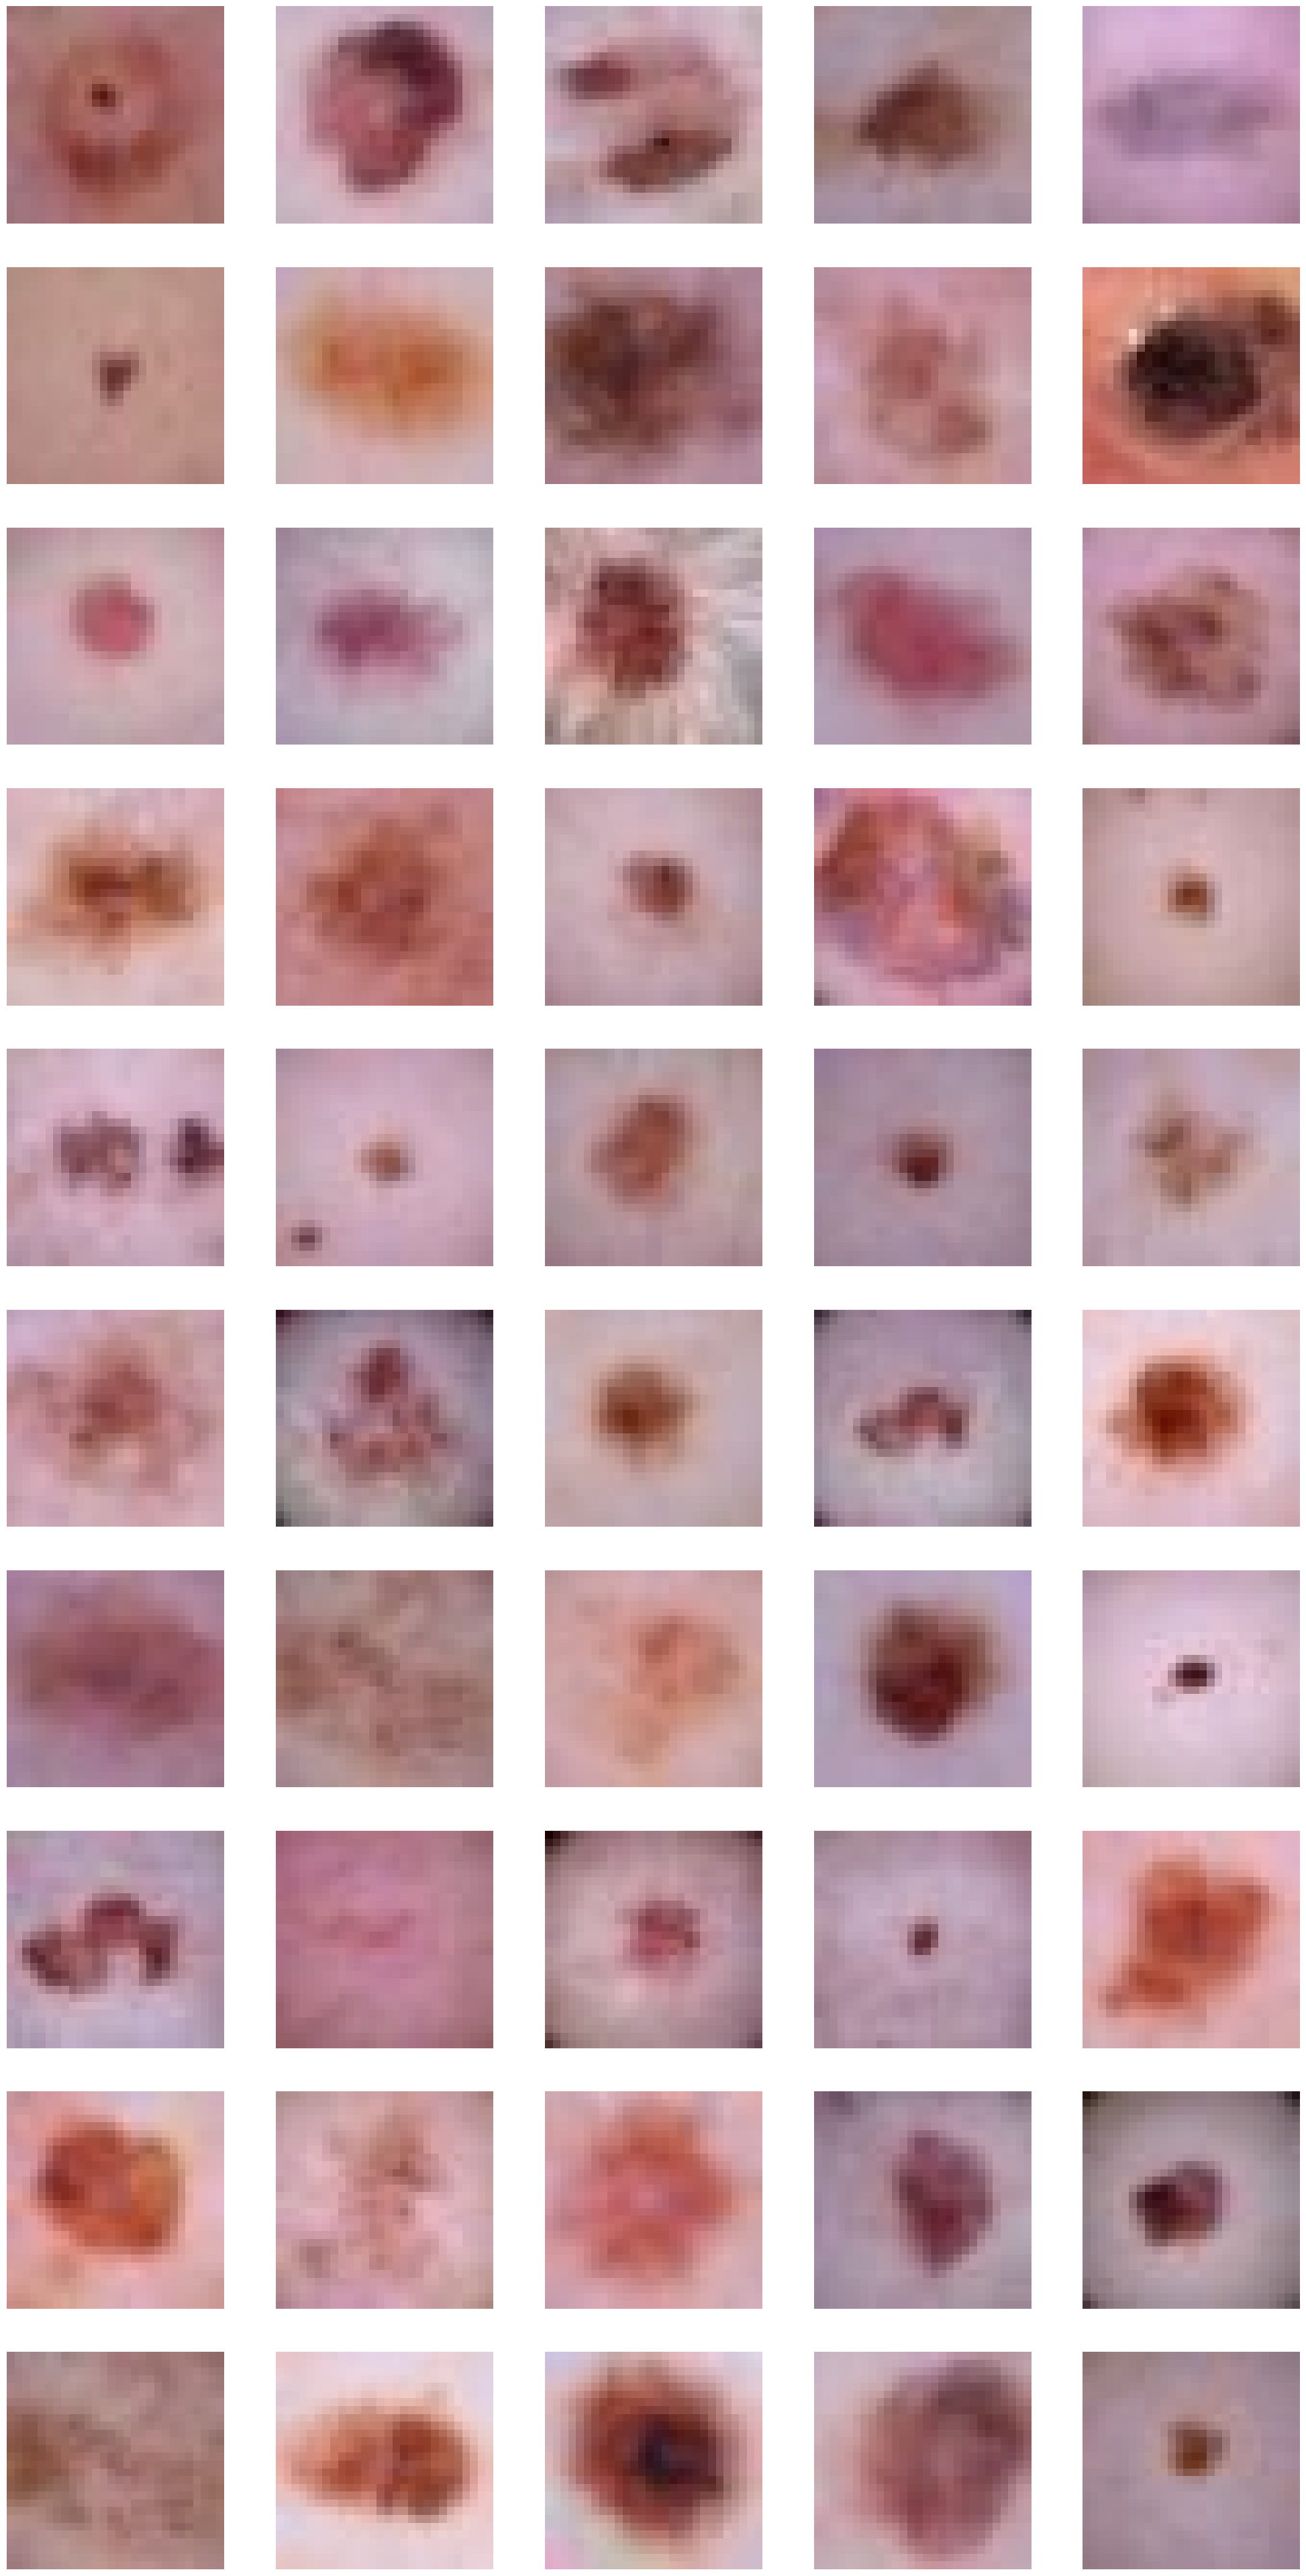

In [51]:
import matplotlib.pyplot as plt

# after smote
num_images_to_visualize = 50
indices = np.random.choice(len(xsynt), num_images_to_visualize, replace=False)

plt.figure(figsize=(25, 100))
for i, index in enumerate(indices, 1):
    plt.subplot(20, 5, i)
    plt.imshow(xsynt[index], cmap='gray')  # Change cmap if your images are colored
    plt.axis('off')
plt.show()

## CNN using Keras

## 1 Conv2D + 1 MaxPool

In [ ]:
# testing with just one Conv2D layer + 1 MaxPool

model = Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
Total params: 1792 (7.00 KB)
Trainable params: 1792 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# flatten and dense layers

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# compile and train

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy',tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.FalsePositives()])


history = model.fit(x_trainbr, y_trainb, epochs=60,
                    validation_data=(x_testvr, ytestv))

Epoch 1/60
303/303 [==============================] - 4s 8ms/step - loss: 0.5644 - accuracy: 0.6994 - true_positives_2: 3723.0000 - true_negatives_2: 3039.0000 - false_negatives_2: 1111.0000 - false_positives_2: 1795.0000 - val_loss: 0.5976 - val_accuracy: 0.6166 - val_true_positives_2: 96.0000 - val_true_negatives_2: 290.0000 - val_false_negatives_2: 6.0000 - val_false_positives_2: 234.0000
Epoch 2/60
303/303 [==============================] - 1s 5ms/step - loss: 0.4902 - accuracy: 0.7506 - true_positives_2: 4053.0000 - true_negatives_2: 3204.0000 - false_negatives_2: 781.0000 - false_positives_2: 1630.0000 - val_loss: 1.1554 - val_accuracy: 0.4345 - val_true_positives_2: 102.0000 - val_true_negatives_2: 170.0000 - val_false_negatives_2: 0.0000e+00 - val_false_positives_2: 354.0000
Epoch 3/60
303/303 [==============================] - 1s 5ms/step - loss: 0.4645 - accuracy: 0.7680 - true_positives_2: 4116.0000 - true_negatives_2: 3309.0000 - false_negatives_2: 718.0000 - false_positive

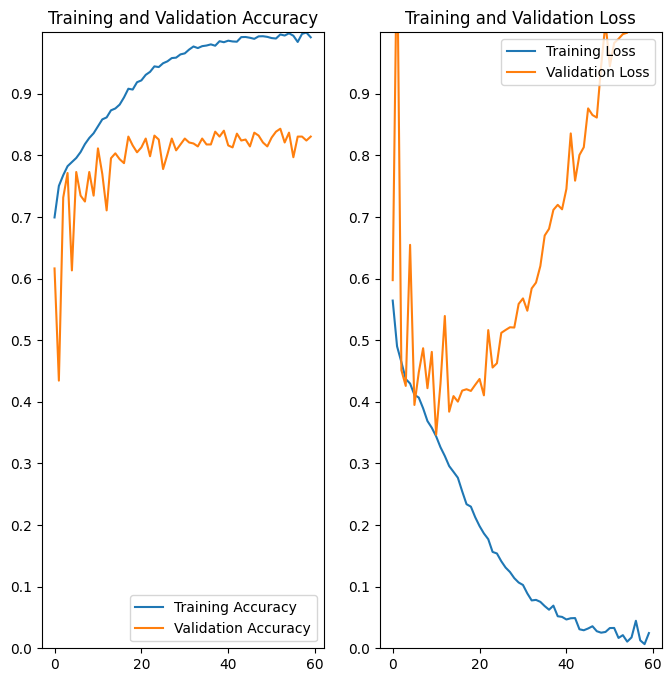

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(60)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim(0,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim(0,1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
stats1 = model.evaluate(x_testvr, ytestv)
tp = stats1[2]
tn = stats1[3]
fn = stats1[4]
fp = stats1[5]

sens = tp/(tp+fn)
spe = tn/(tn+fp)

bal_acc1 = (sens+spe)/2
print(bal_acc1)


20/20 [==============================] - 0s 4ms/step - loss: 1.1125 - accuracy: 0.8307 - true_positives_2: 31.0000 - true_negatives_2: 489.0000 - false_negatives_2: 71.0000 - false_positives_2: 35.0000
0.6185638377488399


## 2 Conv2D + MaxPool

In [ ]:
# new model with two conv2d + max pooling sets and one drop out layer in the end

model2v3 = Sequential()
model2v3.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model2v3.add(layers.MaxPooling2D((2, 2),padding='same'))
model2v3.add(layers.BatchNormalization())
model2v3.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model2v3.add(layers.MaxPooling2D((2, 2),padding='same'))
model2v3.add(layers.BatchNormalization())
model2v3.add(layers.Dropout(0.2))



In [ ]:
model2v3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 128)         0         
                                                                 
Total params: 75648 (295.50 KB)
Trainable params: 75648 

In [ ]:
model2v3.add(layers.Flatten())
model2v3.add(layers.Dense(128, activation='relu'))
model2v3.add(layers.Dropout(0.2))
model2v3.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
learning_rates = [0.001, 0.01, 0.1]
optimizers = [tf.keras.optimizers.Adam, tf.keras.optimizers.SGD, tf.keras.optimizers.Adagrad]
dropout_rates = [0.2, 0.3, 0.4, 0.5]
best_params = opt_lr(model2v3,x_trainbr, y_trainb, x_testvr, ytestv, learning_rates, optimizers)[0]

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.001, 'optimizer': {'name': 'Adam', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'jit_compile': True, 'is_legacy_optimizer': False, 'learning_rate': 0.001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}}


In [ ]:
# compile and train

model2v3.reset_metrics()
#opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model2v3.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy',tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.FalsePositives()])

stop=tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience=5, restore_best_weights=True)

history2v3 = model2v3.fit(x_trainbr, y_trainb, epochs=150, callbacks=[stop],
                    validation_data=(x_testvr, ytestv))

Epoch 1/150
303/303 [==============================] - 4s 7ms/step - loss: 0.5363 - accuracy: 0.7204 - true_positives: 4227.0000 - true_negatives: 2738.0000 - false_negatives: 607.0000 - false_positives: 2096.0000 - val_loss: 0.6061 - val_accuracy: 0.6038 - val_true_positives: 93.0000 - val_true_negatives: 285.0000 - val_false_negatives: 9.0000 - val_false_positives: 239.0000
Epoch 2/150
303/303 [==============================] - 2s 6ms/step - loss: 0.4741 - accuracy: 0.7576 - true_positives: 4307.0000 - true_negatives: 3017.0000 - false_negatives: 527.0000 - false_positives: 1817.0000 - val_loss: 0.5903 - val_accuracy: 0.5591 - val_true_positives: 97.0000 - val_true_negatives: 253.0000 - val_false_negatives: 5.0000 - val_false_positives: 271.0000
Epoch 3/150
303/303 [==============================] - 3s 9ms/step - loss: 0.4516 - accuracy: 0.7737 - true_positives: 4296.0000 - true_negatives: 3184.0000 - false_negatives: 538.0000 - false_positives: 1650.0000 - val_loss: 0.4977 - val_acc

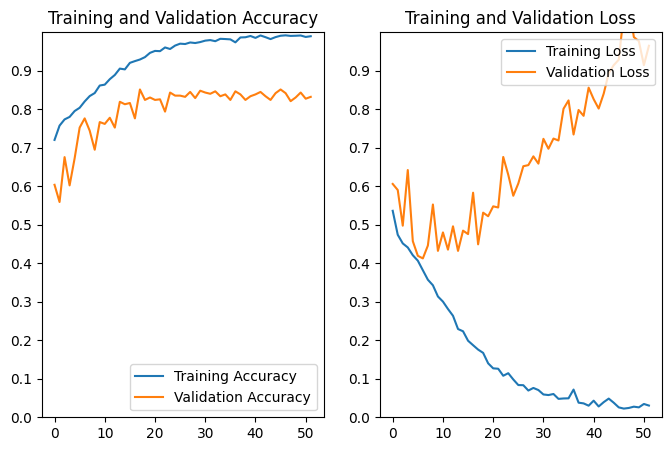

In [ ]:
acc = history2v3.history['accuracy']
val_acc = history2v3.history['val_accuracy']

loss = history2v3.history['loss']
val_loss = history2v3.history['val_loss']

epochs_range = range(52)

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim(0,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim(0,1)
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
stats2 = model2v3.evaluate(x_testvr, ytestv)
tp = stats2[2]
tn = stats2[3]
fn = stats2[4]
fp = stats2[5]

sens = tp/(tp+fn)
spe = tn/(tn+fp)

bal_acc2 = (sens+spe)/2
print(bal_acc2)


20/20 [==============================] - 0s 4ms/step - loss: 1.0491 - accuracy: 0.8419 - true_positives: 48.0000 - true_negatives: 479.0000 - false_negatives: 54.0000 - false_positives: 45.0000
0.6923551863493489


In [ ]:
model2v1.save('model0759.keras')

## 3 Conv2D + MaxPool

In [ ]:
# 3 sets of conv2d+maxpooling + dropout at the end

model3v11 = Sequential()
model3v11.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model3v11.add(layers.MaxPooling2D((2, 2),padding='same'))
model3v11.add(layers.BatchNormalization())
model3v11.add(layers.Dropout(0.2,seed=42))
model3v11.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model3v11.add(layers.BatchNormalization())
model3v11.add(layers.MaxPooling2D((2, 2),padding='same'))
model3v11.add(layers.Dropout(0.2,seed=42))
model3v11.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model3v11.add(layers.BatchNormalization())
model3v11.add(layers.MaxPooling2D((2, 2),padding='same'))
model3v11.add(layers.Dropout(0.4,seed=42))


In [ ]:
model3v11.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_21 (Ba  (None, 13, 13, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_23 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_22 (Ba  (None, 13, 13, 64)       

In [ ]:
model3v11.add(layers.Flatten())
model3v11.add(layers.Dense(256, activation='relu'))
model3v11.add(layers.Dropout(0.2,seed=42))
model3v11.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
print(len(y_trainb),sum(y_trainb))

9668 4834.0


In [ ]:
# compile and train

model3v11.reset_metrics()

#opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model3v11.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy',tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.FalsePositives()])

stop=tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 4, restore_best_weights=True)

history3v11 = model3v11.fit(x_trainbr, y_trainb, epochs=150, callbacks=[stop],
                    validation_data=(x_testvr, ytestv))

Epoch 1/150
303/303 [==============================] - 5s 9ms/step - loss: 0.5560 - accuracy: 0.7361 - true_positives_7: 3769.0000 - true_negatives_7: 3348.0000 - false_negatives_7: 1065.0000 - false_positives_7: 1486.0000 - val_loss: 0.5668 - val_accuracy: 0.7013 - val_true_positives_7: 64.0000 - val_true_negatives_7: 375.0000 - val_false_negatives_7: 38.0000 - val_false_positives_7: 149.0000
Epoch 2/150
303/303 [==============================] - 2s 6ms/step - loss: 0.4612 - accuracy: 0.7725 - true_positives_7: 4072.0000 - true_negatives_7: 3397.0000 - false_negatives_7: 762.0000 - false_positives_7: 1437.0000 - val_loss: 0.9521 - val_accuracy: 0.3387 - val_true_positives_7: 93.0000 - val_true_negatives_7: 119.0000 - val_false_negatives_7: 9.0000 - val_false_positives_7: 405.0000
Epoch 3/150
303/303 [==============================] - 2s 6ms/step - loss: 0.4398 - accuracy: 0.7876 - true_positives_7: 4157.0000 - true_negatives_7: 3458.0000 - false_negatives_7: 677.0000 - false_positives

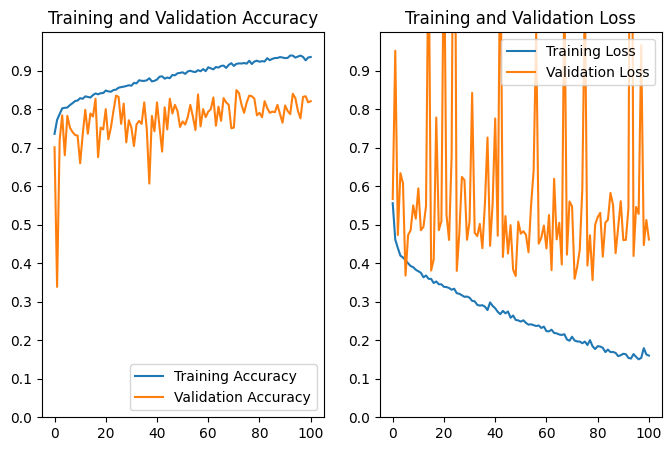

In [ ]:
acc = history3v11.history['accuracy']
val_acc = history3v11.history['val_accuracy']

loss = history3v11.history['loss']
val_loss = history3v11.history['val_loss']

epochs_range = range(101)

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim(0,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim(0,1)
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
stats3 = model3v11.evaluate(x_testvr, ytestv)

20/20 [==============================] - 0s 4ms/step - loss: 0.5281 - accuracy: 0.7764 - true_positives_7: 77.0000 - true_negatives_7: 409.0000 - false_negatives_7: 25.0000 - false_positives_7: 115.0000


In [ ]:
tp = stats3[2]
tn = stats3[3]
fn = stats3[4]
fp = stats3[5]

sens = tp/(tp+fn)
spe = tn/(tn+fp)

bal_acc3 = (sens+spe)/2
print(bal_acc3)

0.767718155964676


## 3 Conv2D + MaxPool Alternative

In [ ]:
# prev 0.79

modelprev = Sequential()
modelprev.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
modelprev.add(layers.MaxPooling2D((2, 2),padding='same'))
modelprev.add(layers.Dropout(0.2))
modelprev.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
modelprev.add(layers.MaxPooling2D((2, 2),padding='same'))
modelprev.add(layers.Dropout(0.2))
modelprev.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
modelprev.add(layers.MaxPooling2D((2, 2),padding='same'))
modelprev.add(layers.Dropout(0.4))


In [ ]:
modelprev.add(layers.Flatten())
modelprev.add(layers.Dense(128, activation='relu'))
modelprev.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
modelprev.reset_metrics()
modelprev.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy',tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.FalsePositives()])

stop=tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 8, restore_best_weights=True)

historyprev = modelprev.fit(x_trainbr, y_trainb, epochs=150, callbacks=[stop],
                    validation_data=(x_testvr, ytestv))

Epoch 1/150
303/303 [==============================] - 4s 8ms/step - loss: 0.6839 - accuracy: 0.5504 - true_positives_18: 2170.0000 - true_negatives_18: 3151.0000 - false_negatives_18: 2664.0000 - false_positives_18: 1683.0000 - val_loss: 0.6242 - val_accuracy: 0.7220 - val_true_positives_18: 16.0000 - val_true_negatives_18: 436.0000 - val_false_negatives_18: 86.0000 - val_false_positives_18: 88.0000
Epoch 2/150
303/303 [==============================] - 2s 6ms/step - loss: 0.6182 - accuracy: 0.6625 - true_positives_18: 3290.0000 - true_negatives_18: 3115.0000 - false_negatives_18: 1544.0000 - false_positives_18: 1719.0000 - val_loss: 0.7557 - val_accuracy: 0.5335 - val_true_positives_18: 100.0000 - val_true_negatives_18: 234.0000 - val_false_negatives_18: 2.0000 - val_false_positives_18: 290.0000
Epoch 3/150
303/303 [==============================] - 2s 6ms/step - loss: 0.5552 - accuracy: 0.7137 - true_positives_18: 4121.0000 - true_negatives_18: 2779.0000 - false_negatives_18: 713.00

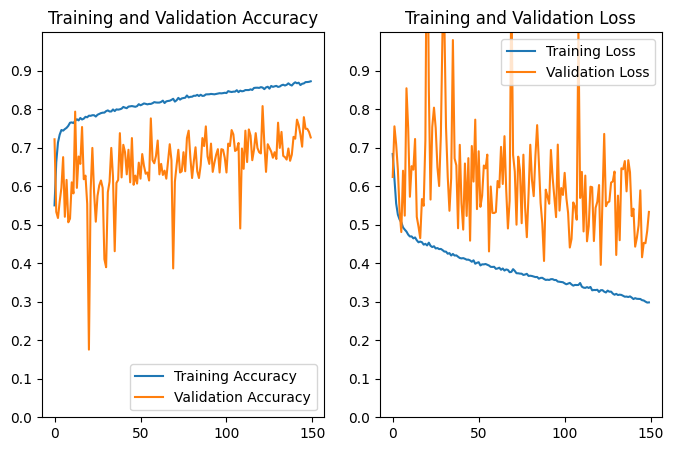

In [ ]:
acc = historyprev.history['accuracy']
val_acc = historyprev.history['val_accuracy']

loss = historyprev.history['loss']
val_loss = historyprev.history['val_loss']

epochs_range = range(150)

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim(0,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim(0,1)
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
stats3 = modelprev.evaluate(x_testvr, ytestv)

20/20 [==============================] - 0s 4ms/step - loss: 0.5334 - accuracy: 0.7268 - true_positives_18: 90.0000 - true_negatives_18: 365.0000 - false_negatives_18: 12.0000 - false_positives_18: 159.0000


In [ ]:
tp = stats3[2]
tn = stats3[3]
fn = stats3[4]
fp = stats3[5]

sens = tp/(tp+fn)
spe = tn/(tn+fp)

bal_acc3 = (sens+spe)/2
print(bal_acc3)

0.7894589133363269


## Changing the dropouts

In [ ]:
modeld = Sequential()
modeld.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
modeld.add(layers.MaxPooling2D((2, 2),padding='same'))
modeld.add(layers.Dropout(0.2))
modeld.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
modeld.add(layers.MaxPooling2D((2, 2),padding='same'))
modeld.add(layers.Dropout(0.2))
modeld.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
modeld.add(layers.MaxPooling2D((2, 2),padding='same'))
modeld.add(layers.Dropout(0.4))


In [ ]:
modeld.add(layers.Flatten())
modeld.add(layers.Dense(128, activation='relu'))
modeld.add(layers.Dropout(0.2))
modeld.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
modeld.reset_metrics()
modeld.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy',tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.FalsePositives()])

stop=tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 6, restore_best_weights=True)

historyd = modeld.fit(x_trainbr, y_trainb, epochs=150, callbacks=[stop],
                    validation_data=(x_testvr, ytestv))

Epoch 1/150
303/303 [==============================] - 3s 7ms/step - loss: 0.6871 - accuracy: 0.5413 - true_positives_33: 2265.0000 - true_negatives_33: 2968.0000 - false_negatives_33: 2569.0000 - false_positives_33: 1866.0000 - val_loss: 0.6345 - val_accuracy: 0.7013 - val_true_positives_33: 17.0000 - val_true_negatives_33: 422.0000 - val_false_negatives_33: 85.0000 - val_false_positives_33: 102.0000
Epoch 2/150
303/303 [==============================] - 2s 6ms/step - loss: 0.6346 - accuracy: 0.6458 - true_positives_33: 3093.0000 - true_negatives_33: 3151.0000 - false_negatives_33: 1741.0000 - false_positives_33: 1683.0000 - val_loss: 1.0120 - val_accuracy: 0.1901 - val_true_positives_33: 102.0000 - val_true_negatives_33: 17.0000 - val_false_negatives_33: 0.0000e+00 - val_false_positives_33: 507.0000
Epoch 3/150
303/303 [==============================] - 2s 6ms/step - loss: 0.5710 - accuracy: 0.7108 - true_positives_33: 4046.0000 - true_negatives_33: 2826.0000 - false_negatives_33: 78

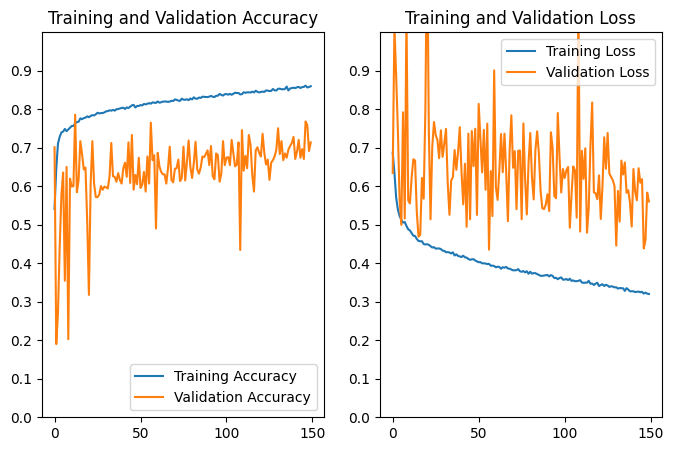

In [ ]:
acc = historyd.history['accuracy']
val_acc = historyd.history['val_accuracy']

loss = historyd.history['loss']
val_loss = historyd.history['val_loss']

epochs_range = range(150)

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim(0,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim(0,1)
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
stats = modeld.evaluate(x_testvr, ytestv)
tp = stats[2]
tn = stats[3]
fn = stats[4]
fp = stats[5]

print(balancedaccuracy(tp,tn,fp,fn))


20/20 [==============================] - 0s 4ms/step - loss: 0.5607 - accuracy: 0.7141 - true_positives_33: 92.0000 - true_negatives_33: 355.0000 - false_negatives_33: 10.0000 - false_positives_33: 169.0000
0.78972085017213


## With data augmentation inside the model (chosen model)

In [ ]:
#create the layers

IMG_SIZE = 180

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [ ]:
modelaug = Sequential()
#modelaug.add(resize_and_rescale)
modelaug.add(data_augmentation)
modelaug.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
modelaug.add(layers.MaxPooling2D((2, 2),padding='same'))
modelaug.add(layers.Dropout(0.2))
modelaug.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
modelaug.add(layers.MaxPooling2D((2, 2),padding='same'))
modelaug.add(layers.Dropout(0.2))
modelaug.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
modelaug.add(layers.MaxPooling2D((2, 2),padding='same'))
modelaug.add(layers.Dropout(0.4))

In [ ]:
modelaug.add(layers.Flatten())
modelaug.add(layers.Dense(128, activation='relu'))
modelaug.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
modelaug.reset_metrics()
modelaug.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy',tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.FalsePositives()])

stop=tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5, restore_best_weights=True)

historyauf = modelaug.fit(x_trainbr, y_trainb, epochs=100, callbacks=[stop],
                    validation_data=(x_testvr, ytestv))

Epoch 1/100
303/303 [==============================] - 4s 8ms/step - loss: 0.6876 - accuracy: 0.5363 - true_positives_25: 1798.0000 - true_negatives_25: 3387.0000 - false_negatives_25: 3036.0000 - false_positives_25: 1447.0000 - val_loss: 0.6453 - val_accuracy: 0.8275 - val_true_positives_25: 0.0000e+00 - val_true_negatives_25: 518.0000 - val_false_negatives_25: 102.0000 - val_false_positives_25: 6.0000
Epoch 2/100
303/303 [==============================] - 2s 7ms/step - loss: 0.6466 - accuracy: 0.6376 - true_positives_25: 2790.0000 - true_negatives_25: 3374.0000 - false_negatives_25: 2044.0000 - false_positives_25: 1460.0000 - val_loss: 0.9082 - val_accuracy: 0.1981 - val_true_positives_25: 102.0000 - val_true_negatives_25: 22.0000 - val_false_negatives_25: 0.0000e+00 - val_false_positives_25: 502.0000
Epoch 3/100
303/303 [==============================] - 2s 7ms/step - loss: 0.5611 - accuracy: 0.7171 - true_positives_25: 4120.0000 - true_negatives_25: 2813.0000 - false_negatives_25: 

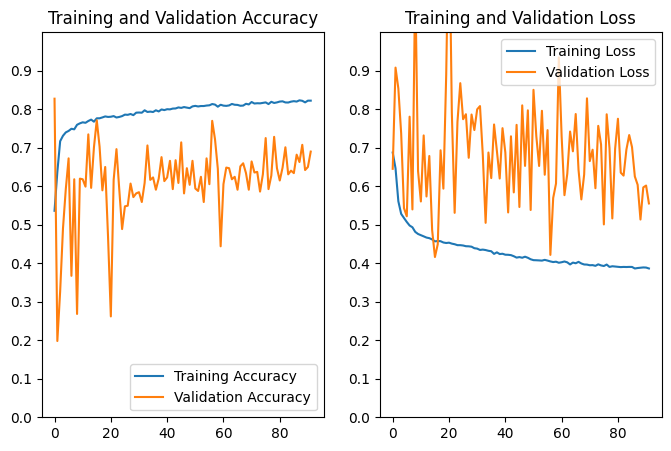

In [ ]:
acc = historyauf.history['accuracy']
val_acc = historyauf.history['val_accuracy']

loss = historyauf.history['loss']
val_loss = historyauf.history['val_loss']

epochs_range = range(92)

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim(0,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim(0,1)
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
stats = modelaug.evaluate(x_testvr, ytestv)
tp = stats[2]
tn = stats[3]
fn = stats[4]
fp = stats[5]

sens = tp/(tp+fn)
spe = tn/(tn+fp)

bal_acc = (sens+spe)/2
print(bal_acc)

20/20 [==============================] - 0s 4ms/step - loss: 0.6254 - accuracy: 0.6821 - true_positives_25: 101.0000 - true_negatives_25: 326.0000 - false_negatives_25: 1.0000 - false_positives_25: 198.0000
0.8061667415057626


In [ ]:
modelaug.save('model080.keras')

In [ ]:
ypred080 = modelaug.predict(xtestr)
ypred080bin = np.where(ypred080 > 0.5,1,0)
print(np.sum(ypred080bin))
print(len(ypred080bin))
print(np.sum(ypred080bin)/len(ypred080bin)*100)
ypred080bin = ypred080bin.ravel()
print(ypred080bin.shape)
np.save('ypred080.npy',ypred080bin)

56/56 [==============================] - 0s 2ms/step
739
1764
41.89342403628118
(1764,)


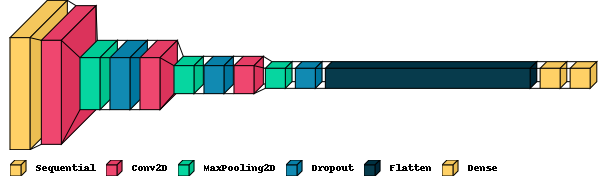

In [ ]:
visualkeras.layered_view(modelaug,legend=True)



In [ ]:
modelaug.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_27 (Sequential)  (None, 28, 28, 3)         0         
                                                                 
 conv2d_65 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_65 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_66 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_66 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_66 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                               

## Tuning Augmentation Parameters

In [ ]:
#create the layers

IMG_SIZE = 180

data_augmentation2 = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [ ]:
modelaug2 = Sequential()
#modelaug.add(resize_and_rescale)
modelaug2.add(data_augmentation2)
modelaug2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
modelaug2.add(layers.MaxPooling2D((2, 2),padding='same'))
modelaug2.add(layers.Dropout(0.2))
modelaug2.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
modelaug2.add(layers.MaxPooling2D((2, 2),padding='same'))
modelaug2.add(layers.Dropout(0.2))
modelaug2.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
modelaug2.add(layers.MaxPooling2D((2, 2),padding='same'))
modelaug2.add(layers.Dropout(0.4))

In [ ]:
modelaug2.add(layers.Flatten())
modelaug2.add(layers.Dense(128, activation='relu'))
modelaug2.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
modelaug2.reset_metrics()
modelaug2.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy',tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.FalsePositives()])

stop=tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5, restore_best_weights=True)

historyaug2 = modelaug2.fit(x_trainbr, y_trainb, epochs=100, callbacks=[stop],
                    validation_data=(x_testvr, ytestv))

Epoch 1/100
303/303 [==============================] - 4s 8ms/step - loss: 0.6872 - accuracy: 0.5373 - true_positives_32: 1954.0000 - true_negatives_32: 3241.0000 - false_negatives_32: 2880.0000 - false_positives_32: 1593.0000 - val_loss: 0.6447 - val_accuracy: 0.8003 - val_true_positives_32: 4.0000 - val_true_negatives_32: 497.0000 - val_false_negatives_32: 98.0000 - val_false_positives_32: 27.0000
Epoch 2/100
303/303 [==============================] - 2s 7ms/step - loss: 0.6446 - accuracy: 0.6383 - true_positives_32: 2802.0000 - true_negatives_32: 3369.0000 - false_negatives_32: 2032.0000 - false_positives_32: 1465.0000 - val_loss: 0.9588 - val_accuracy: 0.2045 - val_true_positives_32: 102.0000 - val_true_negatives_32: 26.0000 - val_false_negatives_32: 0.0000e+00 - val_false_positives_32: 498.0000
Epoch 3/100
303/303 [==============================] - 3s 9ms/step - loss: 0.5637 - accuracy: 0.7116 - true_positives_32: 4067.0000 - true_negatives_32: 2813.0000 - false_negatives_32: 767.

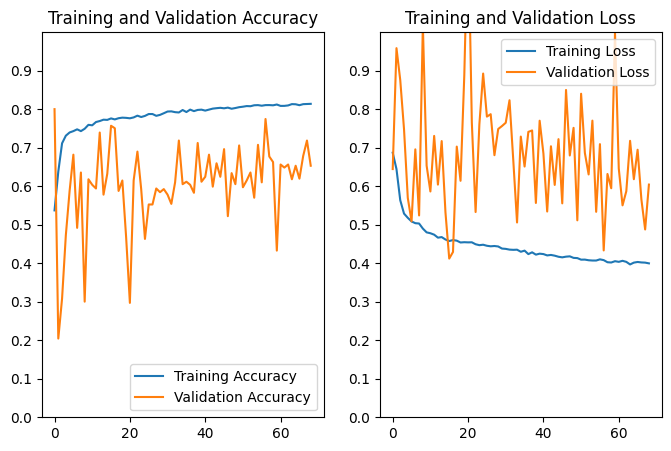

In [ ]:
acc = historyaug2.history['accuracy']
val_acc = historyaug2.history['val_accuracy']

loss = historyaug2.history['loss']
val_loss = historyaug2.history['val_loss']

epochs_range = range(69)

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim(0,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim(0,1)
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
stats = modelaug2.evaluate(x_testvr, ytestv)
tp = stats[2]
tn = stats[3]
fn = stats[4]
fp = stats[5]

sens = tp/(tp+fn)
spe = tn/(tn+fp)

bal_acc = (sens+spe)/2
print(bal_acc)

20/20 [==============================] - 0s 4ms/step - loss: 0.7181 - accuracy: 0.6182 - true_positives_32: 95.0000 - true_negatives_32: 292.0000 - false_negatives_32: 7.0000 - false_positives_32: 232.0000
0.7443122287082773


## 3 Conv2D + MaxPool (dropout only after dense)

In [ ]:
model4 = Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model4.add(layers.MaxPooling2D((2, 2),padding='same'))
model4.add(layers.BatchNormalization())
model4.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPooling2D((2, 2),padding='same'))
model4.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPooling2D((2, 2),padding='same'))
model4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_24 (Ba  (None, 13, 13, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_27 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_25 (Ba  (None, 13, 13, 64)        256       
 tchNormalization)                                               
                                                      

In [ ]:
model4.add(layers.Flatten())
model4.add(layers.Dense(256,activation='relu', kernel_regularizer='l2'))
model4.add(layers.Dropout(0.4))
model4.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
# compile and train

model4.reset_metrics()

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model4.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy',tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.FalsePositives()])

stop=tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3, restore_best_weights=True)

history4 = model4.fit(x_trainbr, y_trainb, epochs=100, callbacks=[stop],
                    validation_data=(x_testvr, ytestv))

Epoch 1/100
303/303 [==============================] - 7s 7ms/step - loss: 0.4874 - accuracy: 0.7742 - true_positives_8: 4064.0000 - true_negatives_8: 3421.0000 - false_negatives_8: 770.0000 - false_positives_8: 1413.0000 - val_loss: 0.4046 - val_accuracy: 0.7875 - val_true_positives_8: 31.0000 - val_true_negatives_8: 462.0000 - val_false_negatives_8: 71.0000 - val_false_positives_8: 62.0000
Epoch 2/100
303/303 [==============================] - 2s 6ms/step - loss: 0.3977 - accuracy: 0.8136 - true_positives_8: 4228.0000 - true_negatives_8: 3638.0000 - false_negatives_8: 606.0000 - false_positives_8: 1196.0000 - val_loss: 0.6578 - val_accuracy: 0.6613 - val_true_positives_8: 97.0000 - val_true_negatives_8: 317.0000 - val_false_negatives_8: 5.0000 - val_false_positives_8: 207.0000
Epoch 3/100
303/303 [==============================] - 2s 6ms/step - loss: 0.3601 - accuracy: 0.8336 - true_positives_8: 4339.0000 - true_negatives_8: 3720.0000 - false_negatives_8: 495.0000 - false_positives_8

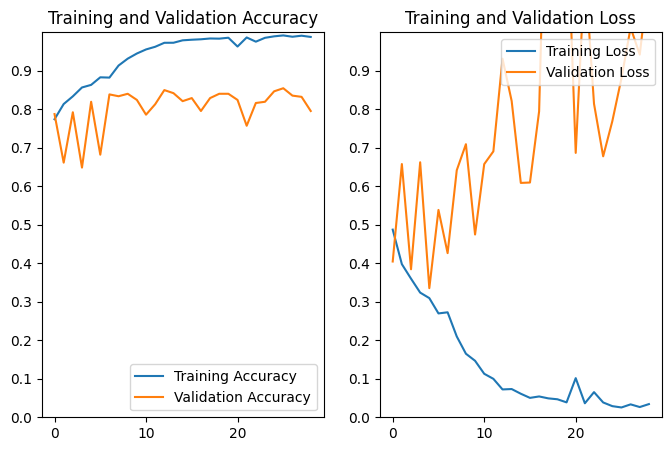

In [ ]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs_range = range(29)

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim(0,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim(0,1)
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
stats3 = model4.evaluate(x_testvr, ytestv)

20/20 [==============================] - 0s 4ms/step - loss: 0.8805 - accuracy: 0.8546 - true_positives_8: 31.0000 - true_negatives_8: 504.0000 - false_negatives_8: 71.0000 - false_positives_8: 20.0000


In [ ]:
tp = stats3[2]
tn = stats3[3]
fn = stats3[4]
fp = stats3[5]

sens = tp/(tp+fn)
spe = tn/(tn+fp)

bal_acc3 = (sens+spe)/2
print(bal_acc3)

0.6328768148480767
